In [32]:
import pandas as pd
import numpy as np
import glob,time,re
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pickle
import os.path
from google_auth_oauthlib.flow import InstalledAppFlow
from google.auth.transport.requests import Request


In [16]:
# Load and analyze datasets in the NeMO/github archive
def read_csv(table):
    # Load data from the github repo
    datadir = 'https://github.com/mukamel-lab/BICCN2.0_Analysis_LIMS/blob/master'
    data = pd.read_csv(datadir + '/%s?raw=true' % table,
                       compression='gzip')
    return data

In [20]:
# Load the table of all analyses
analyses = read_csv('Analyses.csv.gz')
print('Loaded metadata for %d analyses' % analyses.shape[0])

Loaded metadata for 15 analyses


,AnalysisID,Contact,file,Description
0,Analysis0,emukamel@ucsd.edu,Analysis0.csv.gz,Table_S4e_snRNA_10X_v3_B_metadata.tsv.gz
1,Analysis1,emukamel@ucsd.edu,Analysis1.csv.gz,Table_S4b_scRNA_10X_v3_A_metadata.tsv.gz
2,Analysis2,emukamel@ucsd.edu,Analysis2.csv.gz,Table_S4a_scRNA_SMART_metadata.tsv.gz
3,Analysis3,emukamel@ucsd.edu,Analysis3.csv.gz,Table_S4c_scRNA_10X_v2_A_metadata.tsv.gz
4,Analysis4,emukamel@ucsd.edu,Analysis4.csv.gz,Table_S4d_snRNA_SMART_metadata.tsv.gz
5,Analysis5,emukamel@ucsd.edu,Analysis5.csv.gz,Table_S4f_snRNA_10X_v3_A_metadata.tsv.gz
6,Analysis7,emukamel@ucsd.edu,Analysis7.csv.gz,MOp snATAC-Seq with tsne
7,Analysis8,emukamel@ucsd.edu,Analysis8.csv.gz,MOp snATAC-Seq with umap
8,Analysis9,emukamel@ucsd.edu,Analysis9.csv.gz,MOp snmC-Seq with tsne
9,Analysis10,emukamel@ucsd.edu,Analysis10.csv.gz,MOp snmC-Seq with umap


In [ ]:
analysis = read_csv('Analysis9.csv.gz')

In [31]:
analysis

,Unnamed: 0,cellID,cluster_id,cluster_label,subclass_label,class_label,embedding1,embedding2,MappedReads,InputReads,CH_Rate,PassFilter,FullCellID,FinalReads,umap_1,CH_RateAdj,CG_Rate,CG_RateAdj,CCC_Rate,umap_0
0,0,2C_M_0,L4-IT-Rorb_Rorb-Tenm2,L4-IT-Rorb_Rorb-Tenm2,L4-IT-Rorb,NaN,-3.343437,18.330174,1517338.0,2314862,0.02154,True,180508_CEMBA_mm_P56_P63_2C_CEMBA180409_2C_1_CE...,1076259.0,7.099836,0.01651,0.77073,0.76955,0.00511,10.051389
1,1,2C_M_1,L23-IT-Cux2,L23-IT-Cux2,L23-IT-Cux2,NaN,9.212860,-26.514785,1709334.0,2590626,0.02196,True,180508_CEMBA_mm_P56_P63_2C_CEMBA180409_2C_1_CE...,1197092.0,-1.786627,0.01674,0.75683,0.75553,0.00531,13.717241
2,2,2C_M_10,Outlier,Outlier,Outlier,NaN,-22.960995,13.509483,1606410.0,2348484,0.02603,True,180508_CEMBA_mm_P56_P63_2C_CEMBA180409_2C_1_CE...,1006630.0,9.943986,0.02034,0.75720,0.75578,0.00581,4.829485
3,3,2C_M_100,L23-IT-Cux2,L23-IT-Cux2,L23-IT-Cux2,NaN,12.798545,-17.126331,3154619.0,4599922,0.02718,True,180508_CEMBA_mm_P56_P63_2C_CEMBA180409_2C_1_CE...,2026078.0,1.107174,0.02097,0.74984,0.74824,0.00634,13.739521
4,4,2C_M_1000,L23-IT-Cux2,L23-IT-Cux2,L23-IT-Cux2,NaN,8.443658,-27.943267,3648786.0,5320502,0.02117,True,180508_CEMBA_mm_P56_P63_2C_CEMBA180409_2C_3_CE...,2368464.0,-2.284118,0.01604,0.77073,0.76953,0.00521,14.154541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9871,9871,5D_M_995,L5-PT-Bcl6,L5-PT-Bcl6,L5-PT-Bcl6,NaN,-11.125630,-41.527185,1190789.0,1767844,0.03183,True,180627_CEMBA_mm_P56_P63_5D_CEMBA180605_5D_3_CE...,800968.0,-9.383527,0.02594,0.80138,0.80017,0.00605,8.149108
9872,9872,5D_M_996,L4-IT-Rorb_Rorb-Tenm2,L4-IT-Rorb_Rorb-Tenm2,L4-IT-Rorb,NaN,-10.677095,27.946736,1064644.0,1594474,0.02246,True,180627_CEMBA_mm_P56_P63_5D_CEMBA180605_5D_3_CE...,718290.0,6.129021,0.01778,0.80081,0.79986,0.00476,6.512970
9873,9873,5D_M_997,L4-IT-Rorb_Rorb-Tenm2,L4-IT-Rorb_Rorb-Tenm2,L4-IT-Rorb,NaN,-10.110227,28.544857,928844.0,1365894,0.02040,True,180627_CEMBA_mm_P56_P63_5D_CEMBA180605_5D_3_CE...,625473.0,5.774989,0.01570,0.79146,0.79046,0.00478,6.878475
9874,9874,5D_M_998,L6-CT-Foxp2_Foxp2-Glra2,L6-CT-Foxp2_Foxp2-Glra2,L6-CT-Foxp2,NaN,21.858532,9.493263,2506658.0,3652902,0.03079,True,180627_CEMBA_mm_P56_P63_5D_CEMBA180605_5D_3_CE...,1536923.0,-7.893738,0.02522,0.82569,0.82469,0.00571,23.757244


In [65]:
sns.set_style('white')

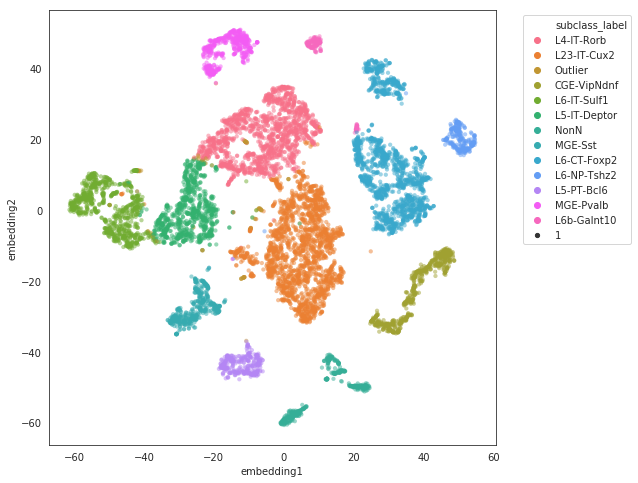

In [72]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=analysis,
                x='embedding1', y='embedding2',
                hue='subclass_label',
                legend='full',
                linewidth=0,
                size=1,
                alpha=0.5,
               )
plt.legend(bbox_to_anchor=(1.05, 1))